In [2]:
!pip install scikit-plot

In [3]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scikitplot as skplt
from sklearn import tree
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

Download the data from http://www.saedsayad.com/datasets/BikeRental.zip


In [6]:
!wget http://www.saedsayad.com/datasets/BikeRental.zip

--2024-07-12 09:05:08--  http://www.saedsayad.com/datasets/BikeRental.zip
Resolving www.saedsayad.com (www.saedsayad.com)... 66.96.147.144
Connecting to www.saedsayad.com (www.saedsayad.com)|66.96.147.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48258 (47K) [application/zip]
Saving to: ‘BikeRental.zip’

BikeRental.zip      100%[===================>]  47.13K  --.-KB/s    in 0.1s    

2024-07-12 09:05:08 (358 KB/s) - ‘BikeRental.zip’ saved [48258/48258]



In [7]:
!unzip BikeRental.zip

Archive:  BikeRental.zip
   creating: BikeRental/
  inflating: BikeRental/bike_rental_test.csv  
  inflating: BikeRental/bike_rental_train.csv  


In [9]:
trainset=pd.read_csv('/content/BikeRental/bike_rental_train.csv')
testset=pd.read_csv('/content/BikeRental/bike_rental_test.csv')

In [11]:
trainset.shape, testset.shape

((9801, 4), (1085, 4))

In [13]:
trainset.columns

Index(['temp', 'humidity', 'windspeed', 'bike_rent_count'], dtype='object')

In [14]:
# training
cols=['temp', 'humidity', 'windspeed']
tr=trainset.dropna(axis=0,how='any')
X_train=tr[cols]
y_train=tr['bike_rent_count']

In [15]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [16]:
# show the model parameters
print(mlr.intercept_, mlr.coef_, mlr.score(X_train, y_train))

176.5065507679416 [ 8.73939171 -2.68048945  0.30852321] 0.2385652097469836


In [17]:
# testing
cols=['temp', 'humidity', 'windspeed']
ts=testset.dropna(axis=0,how='any')
X_test=ts[cols]
y_test=ts['bike_rent_count']
y_pred = mlr.predict(X_test)
print('R-squared of multiple linear regression on test set: {:.2f}'.format(mlr.score(X_test, y_test)))

R-squared of multiple linear regression on test set: 0.27


In [18]:
# mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  24325.71235706265
RMSE:  155.9670232999997


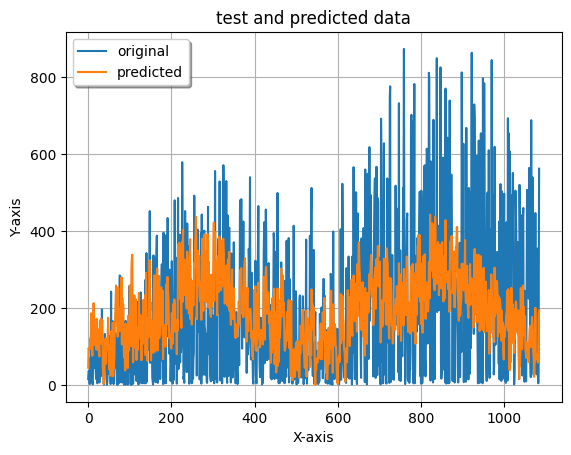

In [19]:
# plot original and predicted values
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<Axes: xlabel='bike_rent_count', ylabel='Count'>

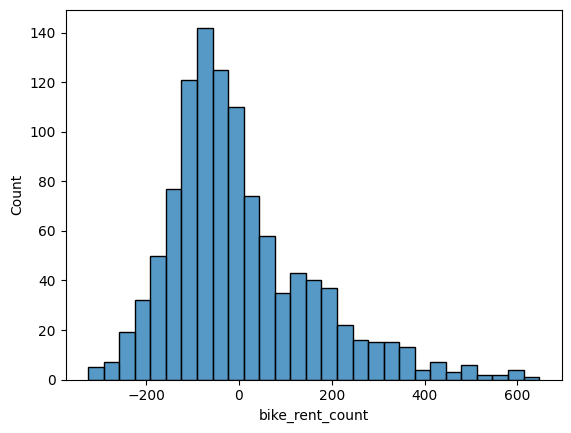

In [20]:
# residulas
res=y_test-y_pred
sns.histplot(res)

<Axes: xlabel='bike_rent_count'>

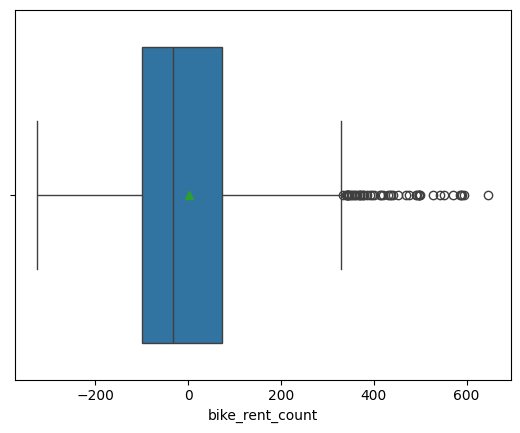

In [21]:
sns.boxplot(x=res, showmeans=True)

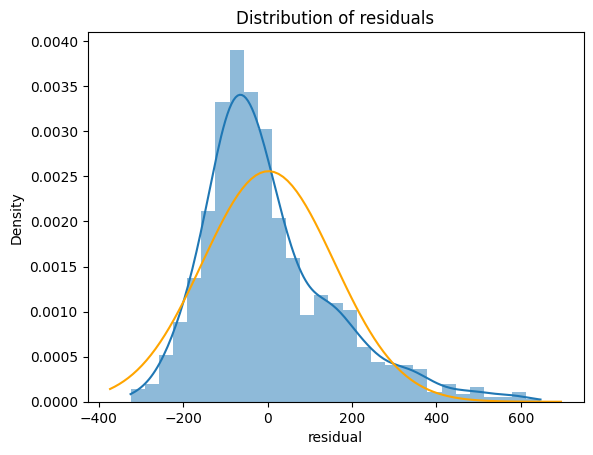

In [22]:
mu, std = stats.norm.fit(res)
fig, ax = plt.subplots()

# plot the residuals
sns.histplot(x=res, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

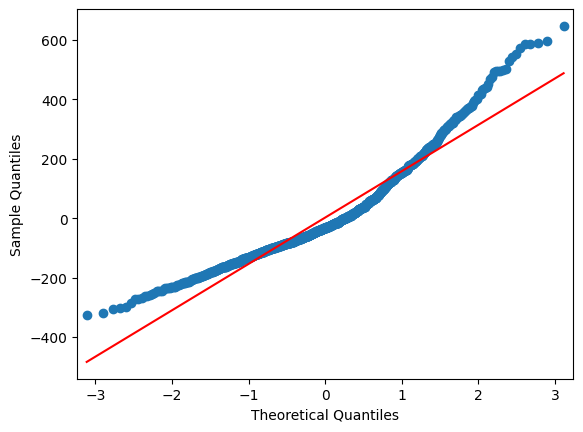

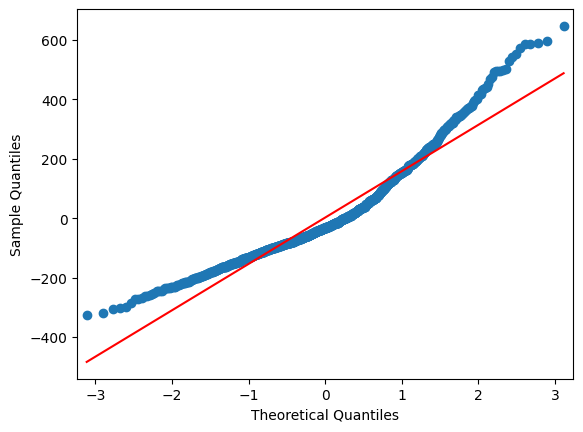

In [23]:
# Q-Q plot
sm.qqplot(res, line='s')

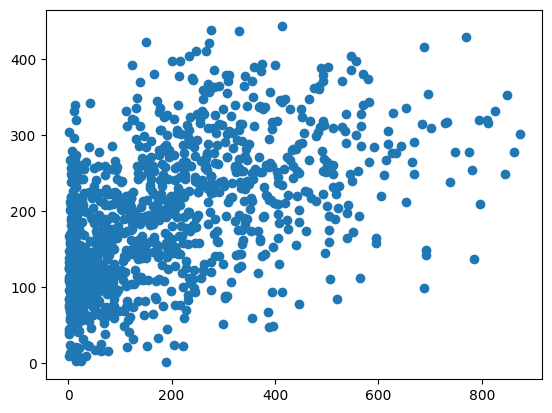

In [24]:
# scatter plot
plt.scatter(y_test,y_pred)